## Analysis

* Linear
$$
𝔼[TotalUniqueClients] = 𝑎 × TotalProviders + 𝑏
$$

* Quadratic
$$
\operatorname{\mathbb{E}}[\text{TotalUniqueClients}] = a \times \text{TotalProviders}^2 + b
$$

* Logarithmic
$$
𝔼[TotalUniqueClients]= 𝑎 × ln(TotalProviders) + 𝑏
$$

In [2]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import numpy as np
%matplotlib inline

In [3]:
providers = pd.read_csv('providers_aggregate_data.csv')
providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   City                   8737 non-null   object
 1   State                  8737 non-null   object
 2   Country                8737 non-null   object
 3   TotalProviders         8737 non-null   int64 
 4   TotalProviderPairs     8737 non-null   int64 
 5   TotalUniqueClients     8737 non-null   int64 
 6   TotalSpecialist        8737 non-null   int64 
 7   TotalNoTaxonomyRecord  8737 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 546.2+ KB


In [4]:
# Check null values
providers.isnull().sum()

City                     0
State                    0
Country                  0
TotalProviders           0
TotalProviderPairs       0
TotalUniqueClients       0
TotalSpecialist          0
TotalNoTaxonomyRecord    0
dtype: int64

In [5]:
# Fill null values to zero
providers.fillna(0)
# Check again null values
providers.isnull().sum()

City                     0
State                    0
Country                  0
TotalProviders           0
TotalProviderPairs       0
TotalUniqueClients       0
TotalSpecialist          0
TotalNoTaxonomyRecord    0
dtype: int64

In [6]:
# Function for getting residual between actual and prediction
def get_residual(y_actual, y_predict, file):
    # Create data frame for residual
    residual = pd.DataFrame({
        'predictions': y_predict,
        'actual': y_actual
    })
    residual['error'] = residual['predictions'] - residual['actual']
    residual.reset_index(inplace=True)
    display(residual.sort_values(by='error').head(5))

    # Save residual of linear regression to file
    residual.to_csv(file)

    # Plot Residual
    fig = plt.figure(figsize=(7,5))
    for i in range(residual.ndim):
        plt.bar('index', 'error', data=residual[i:].sort_values('actual'), color=cmap(0.9), width=6)
    plt.xlabel('Observations')
    plt.ylabel('Residuals')
    plt.title('Test Data and Test Prediction')
    print('Minimum error:', residual['error'].min())
    print('Maximum error:', residual['error'].max())
    return residual

# Get the formula base on regression type
def get_x_reg_form(type):
    if type.lower() == 'linear':
        return f'{type} Regression\n'
    elif type.lower() == 'quadratic':
        return f'{type} Regression\n'
    elif type.lower() == 'logarithmic':
        return f'{type} Regression\n'
    
# Function for regression training and testing
def regression(X, y, split_data=False, test_size=0.3, random_state=29, type='Linear', x_label = 'TotalProviders', plot=True):
    if split_data:
        # Split train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    else:
        X_train, X_test, y_train, y_test = X, X, y, y

    # Create model and train it
    model = lr(
        fit_intercept=False,
        positive=True
    ).fit(X_train, y_train)
    print(f'\n\n{type} modelression:')
    print(f'Intercept: {model.intercept_}')
    print(f'Coefficient: {model.coef_[0]}')

    # Make predictions on test data
    y_predict = model.predict(X_test)

    # Calculate R2 and MSE
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_predict)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    mae = mean_absolute_error(y_test, y_predict)
    print(f'R-squared: {score:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root-mean-square deviation (RMSE): {rmse:.2f}')

    # Plot data and prediction
    if plot:
        fig,ax = plt.subplots()
        text_loc = [0.6, 0.2]
        ax.loglog(X_test, y_test, 'o', color=cmap(0.3))
        if type.lower() == 'logarithmic':
            text_loc = [0.1, 0.7]
        fig.text(text_loc[0], text_loc[1], f'\n    Coefficient: {model.coef_[0]:.4f}\n\
                Intercept: {model.intercept_:.4f}\n\
                R-squared: {score:.2f}\n\
                MAE: {mae:.2f}')
        plt.plot(X_test, y_predict, '--', color='red')
        plt.xlabel(x_label)
        plt.ylabel('Total Unique Clients')
        title = get_x_reg_form(type)
        plt.title(title)

        # Create data frame for residual and save to file
        residual = get_residual(y, y_predict, type + '_regression_residual.csv')

    return model.coef_, model.intercept_, score, mse

# Color palette
cmap = plt.get_cmap('viridis')

## Linear Regression

$$
𝔼[TotalUniqueClients] = 𝑎 × TotalProviders + 𝑏
$$



Linear modelression:
Intercept: 0.0
Coefficient: 77.06122877611182
R-squared: 0.66
Mean Absolute Error (MAE): 40047.10
Mean Squared Error (MSE): 20176162298.72
Root-mean-square deviation (RMSE): 142042.82


,index,predictions,actual,error
1,1,1.511017e+06,5393738,-3.882721e+06
0,0,3.994006e+06,7013243,-3.019237e+06
5,5,1.450292e+06,3640063,-2.189771e+06
12,12,8.291018e+05,2874256,-2.045154e+06
4,4,1.908884e+06,3677025,-1.768141e+06


Minimum error: -3882721.426158
Maximum error: 2048859.9482454616


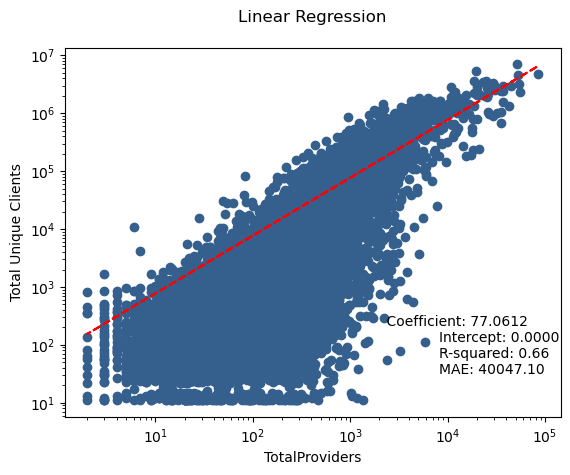

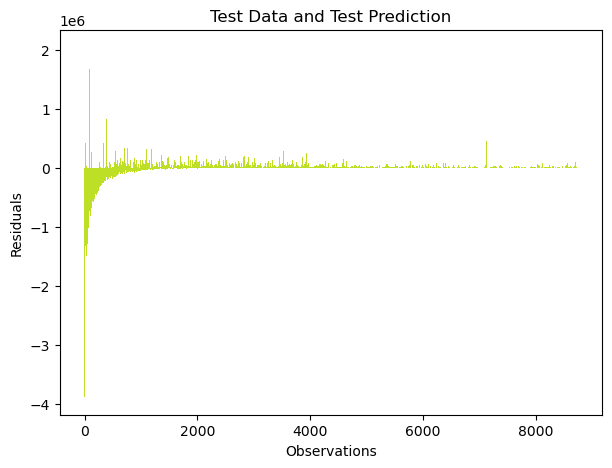

In [7]:
# Define variables
X = np.array(providers['TotalProviders']).reshape(-1,1)
y = np.array(providers['TotalUniqueClients'])

# Perform Regression without split
coef, intercept, score, mse = regression(X, y, split_data=False)

## Quadratic
$$
\operatorname{\mathbb{E}}[\text{TotalUniqueClients}] = a \times \text{TotalProviders}^2 + b
$$



Quadratic modelression:
Intercept: 0.0
Coefficient: 0.001319808900138013
R-squared: 0.34
Mean Absolute Error (MAE): 45263.69
Mean Squared Error (MSE): 39035667826.47
Root-mean-square deviation (RMSE): 197574.46


,index,predictions,actual,error
1,1,5.074318e+05,5393738,-4.886306e+06
0,0,3.545330e+06,7013243,-3.467913e+06
5,5,4.674663e+05,3640063,-3.172597e+06
4,4,8.098380e+05,3677025,-2.867187e+06
6,6,7.195279e+05,3442682,-2.723154e+06


Minimum error: -4886306.236384128
Maximum error: 4664516.539813139

	---| Quadratic formula: TotalUniqueClients = 0.0 * TotalProviders^2 + [0.00131981] |---


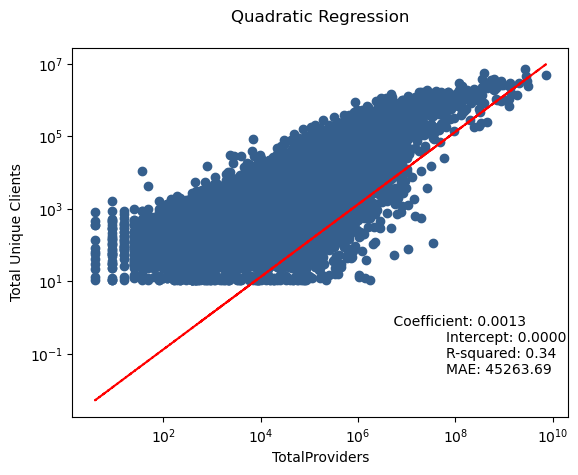

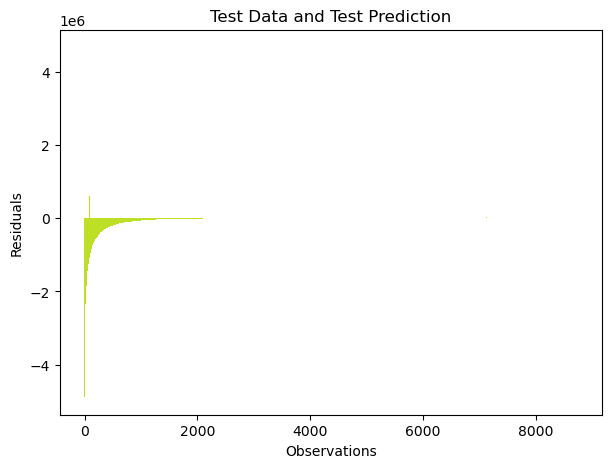

In [8]:
# Quadratic regression
X = np.array(providers['TotalProviders']**2).reshape(-1,1)
y = np.array(providers['TotalUniqueClients'])

# Perform regression
qr_intercept, qr_coef, score, mse = regression(X, y, split_data=False, type='Quadratic')
print(f'\n\t---| Quadratic formula: TotalUniqueClients = {qr_coef} * TotalProviders^2 + {qr_intercept} |---')

* Logarithmic
$$
𝔼[TotalUniqueClients]= 𝑎 × ln(TotalProviders) + 𝑏
$$



Logarithmic modelression:
Intercept: 0.0
Coefficient: 15691.196949325435
R-squared: 0.07
Mean Absolute Error (MAE): 95575.92
Mean Squared Error (MSE): 54987815630.62
Root-mean-square deviation (RMSE): 234494.81


,index,predictions,actual,error
0,0,170339.007017,7013243,-6.842904e+06
1,1,155086.972276,5393738,-5.238651e+06
2,2,178084.286989,4850248,-4.672164e+06
3,3,170750.451130,4667786,-4.497036e+06
4,4,158754.569382,3677025,-3.518270e+06


Minimum error: -6842903.992982962
Maximum error: 136027.6866696816

	---| Logarithmic formula: TotalUniqueClients = 0.0 * log(TotalProviders) + [15691.19694933] |---


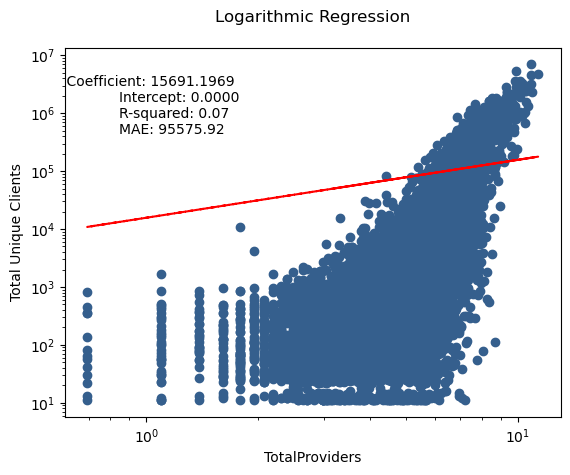

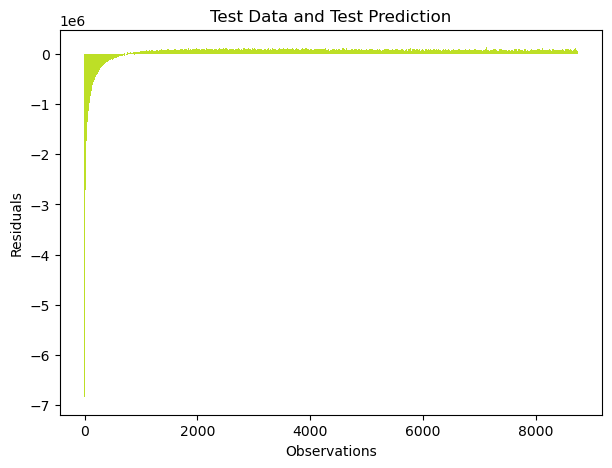

In [9]:
# Logarithmic regression
X = np.array(np.log(providers['TotalProviders'])).reshape(-1,1)
y = np.array(providers['TotalUniqueClients'])

# Logarithmic regression formula
lg_intercept, lg_coef, score, mse = regression(X, y, split_data=False, type='Logarithmic')
print(f'\n\t---| Logarithmic formula: TotalUniqueClients = {lg_coef} * log(TotalProviders) + {lg_intercept} |---')

In [10]:
# Polyfit
X = np.array(providers['TotalProviders'])
y = np.array(providers['TotalUniqueClients'])
model = np.polyfit(X, y, deg=1)
coef, intercept = model
predict = np.poly1d(model)
score = r2_score(y, predict(X))
score

0.6586108057077149